In [16]:
## Gist originally developed by @craffel and improved by @ljhuang2017

import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, coefs_, intercepts_, n_iter_, loss_):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Input-Arrows
    layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
    for m in range(layer_sizes[0]):
        plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,  lw =1, head_width=0.01, head_length=0.02)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8.,
                                color='w', ec='k', zorder=4)
            if n == 0:
                plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m+1)+'}$', fontsize=15)
            elif (n_layers == 3) & (n == 1):
                plt.text(n*h_spacing + left+0.00, layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), r'$H_{'+str(m+1)+'}$', fontsize=15)
            elif n == n_layers -1:
                plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, r'$y_{'+str(m+1)+'}$', fontsize=15)
            ax.add_artist(circle)
    # Bias-Nodes
    for n, layer_size in enumerate(layer_sizes):
        if n < n_layers -1:
            x_bias = (n+0.5)*h_spacing + left
            y_bias = top + 0.005
            circle = plt.Circle((x_bias, y_bias), v_spacing/8., color='w', ec='k', zorder=4)
            plt.text(x_bias-(v_spacing/8.+0.10*v_spacing+0.01), y_bias, r'$1$', fontsize=15)
            ax.add_artist(circle)   
    # Edges
    # Edges between nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                xm = (n*h_spacing + left)
                xo = ((n + 1)*h_spacing + left)
                ym = (layer_top_a - m*v_spacing)
                yo = (layer_top_b - o*v_spacing)
                rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
                rot_mo_deg = rot_mo_rad*180./np.pi
                xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
                if n == 0:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
                else:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
                plt.text( xm1, ym1,\
                         str(round(coefs_[n][m, o],4)),\
                         rotation = rot_mo_deg, \
                         fontsize = 10)
    # Edges between bias and nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        if n < n_layers-1:
            layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
            layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        x_bias = (n+0.5)*h_spacing + left
        y_bias = top + 0.005 
        for o in range(layer_size_b):
            line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
                          [y_bias, layer_top_b - o*v_spacing], c='k')
            ax.add_artist(line)
            xo = ((n + 1)*h_spacing + left)
            yo = (layer_top_b - o*v_spacing)
            rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
            rot_bo_deg = rot_bo_rad*180./np.pi
            xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
            yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
            xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
            yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
            plt.text( xo1, yo1,\
                 str(round(intercepts_[n][o],4)),\
                 rotation = rot_bo_deg, \
                 fontsize = 10)    
                
    # Output-Arrows
    layer_top_0 = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
    for m in range(layer_sizes[-1]):
        plt.arrow(right+0.015, layer_top_0 - m*v_spacing, 0.16*h_spacing, 0,  lw =1, head_width=0.01, head_length=0.02)
    # Record the n_iter_ and loss
    plt.text(left + (right-left)/3., bottom - 0.005*v_spacing, \
             'Steps:'+str(n_iter_)+'    Loss: ' + str(round(loss_, 6)), fontsize = 15)

In [21]:
%store -r data1
%store -r data2
data1

[array([[ 0.91514915, -1.6628609 ,  5.83528247],
        [-3.26372417,  2.37593465, -4.10844494],
        [-0.99764868, -4.0185194 , -4.56020043],
        [ 4.62163084,  5.17363938,  2.49515676],
        [-4.80890626, -3.31387448,  0.81353811],
        [-4.59111955,  3.33311686,  2.78988265],
        [ 3.71027825,  0.97286801, -4.70572428],
        [ 3.99263491, -4.8491122 ,  0.04209614]]),
 array([[  1.61489715,  -6.12326305,  -2.64173269,   5.33494433,
         -10.82519296,  -6.82151642,   6.83021367,   8.79647231],
        [ -5.49899666,   6.07164899,  -7.73065345,   5.11209906,
          -8.43350955,   4.38715559,   3.04842518, -10.98998726],
        [ 10.17861412,  -8.23424494, -10.96332143,   3.79694918,
           5.48481198,   6.34668989, -10.07554838,  -2.72494782]])]

/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


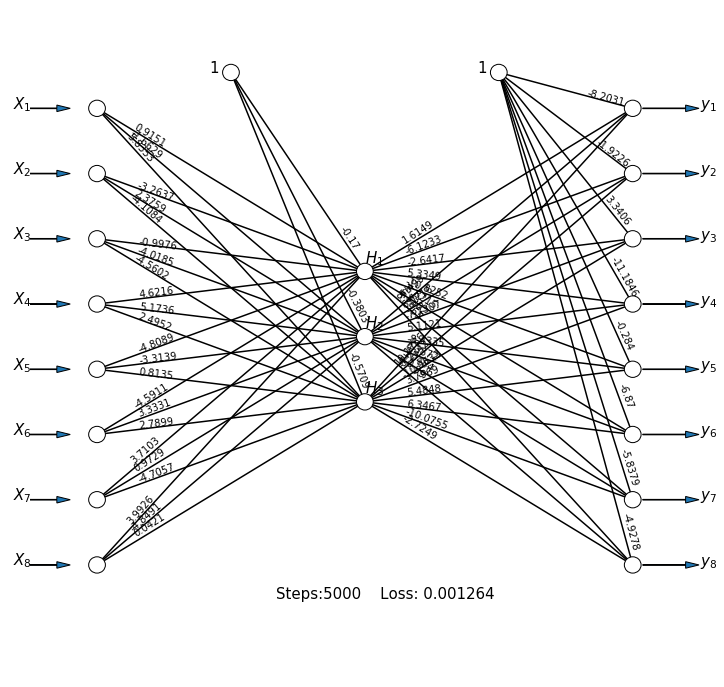

In [29]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier as MLP

#--------[1] Input data
dataset = np.mat('-1 -1 -1; -1 1 1; 1 -1 1; 1 1 -1')
X_train = dataset
y_train = np.mat('0; 1; 1; 0')
#-----2-2-1
my_hidden_layer_sizes= (6,)
#------2-2-8-1
#my_hidden_layer_sizes= (2, 8,)
#------2-16-16-1
#my_hidden_layer_sizes= (16, 16,)

XOR_MLP = MLP(
    activation='tanh',
    alpha=0.,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes= my_hidden_layer_sizes,
    learning_rate='constant',
    learning_rate_init = 0.1,
    max_iter=5000,
    momentum=0.5,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=0,
    shuffle=True,
    solver='sgd',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False)

XOR_MLP.fit(X_train,y_train)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

layer_sizes = [2] + list(my_hidden_layer_sizes) + [1]
draw_neural_net(ax, .1, .9, .1, .9, [8,3,8], data1, data2, 5000, 0.001264)
fig.savefig('nn_digaram.png',bbox_inches='tight', pad_inches = 0, dpi = 200)

In [8]:
XOR_MLP.coefs_


[array([[ 0.17005885,  0.16982756,  0.21995205, -0.1290421 , -0.04463252,
          0.14981586],
        [-0.09303035,  0.37236339,  0.38452277, -0.20444037,  0.30311192,
          0.00572945],
        [-0.9365999 ,  1.20317328, -1.50369892,  0.07617205, -1.18293866,
          0.8258746 ]]), array([[-1.26257843],
        [ 1.1935004 ],
        [-1.7068858 ],
        [ 0.51340726],
        [-1.14453993],
        [ 0.68307642]])]

In [6]:
XOR_MLP.intercepts_

[array([-0.0691795 ,  0.93110698]), array([0.38188918])]